In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/cybersecurity_intrusion_data.csv")
df.head()

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB


In [4]:
df.describe()

,network_packet_size,login_attempts,session_duration,ip_reputation_score,failed_logins,unusual_time_access,attack_detected
count,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000
mean,500.430639,4.032086,792.745312,0.331338,1.517773,0.149942,0.447101
std,198.379364,1.963012,786.560144,0.177175,1.033988,0.357034,0.497220
min,64.000000,1.000000,0.500000,0.002497,0.000000,0.000000,0.000000
25%,365.000000,3.000000,231.953006,0.191946,1.000000,0.000000,0.000000
50%,499.000000,4.000000,556.277457,0.314778,1.000000,0.000000,0.000000
75%,635.000000,5.000000,1105.380602,0.453388,2.000000,0.000000,1.000000
max,1285.000000,13.000000,7190.392213,0.924299,5.000000,1.000000,1.000000


In [5]:
df.isnull().sum()

,0
session_id,0
network_packet_size,0
protocol_type,0
login_attempts,0
session_duration,0
encryption_used,1966
ip_reputation_score,0
failed_logins,0
browser_type,0
unusual_time_access,0


In [6]:
print("Shape of dataset:", df.shape)

Shape of dataset: (9537, 11)


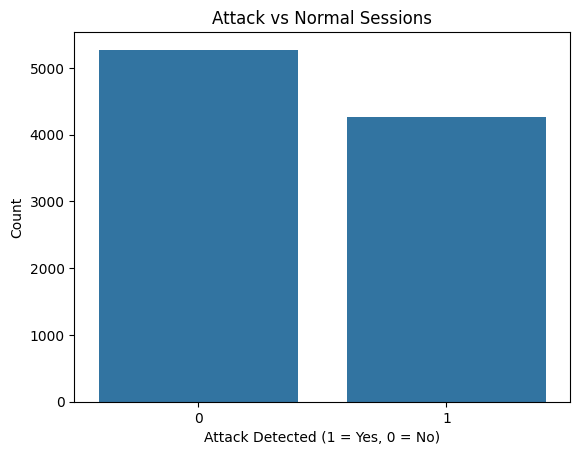

,proportion
attack_detected,
0,0.552899
1,0.447101


In [10]:
sns.countplot(x='attack_detected', data=df)
plt.title("Attack vs Normal Sessions")
plt.xlabel("Attack Detected (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

# Check class balance
df['attack_detected'].value_counts(normalize=True)


In [11]:
df['encryption_used'].value_counts(dropna=False)


,count
encryption_used,
AES,4706
DES,2865
NaN,1966


In [12]:
df.dropna(subset=['encryption_used'], inplace=True)

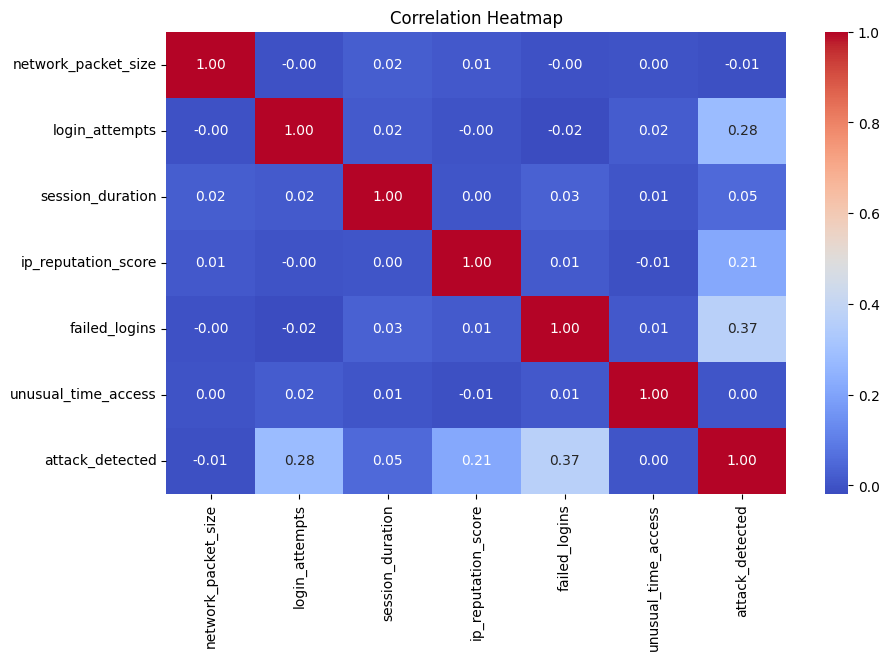

In [13]:
numeric_features = df.select_dtypes(include=['int64', 'float64'])
corr = numeric_features.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [14]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=['protocol_type', 'encryption_used', 'browser_type'], drop_first=True)
df_encoded.head()


,session_id,network_packet_size,login_attempts,session_duration,ip_reputation_score,failed_logins,unusual_time_access,attack_detected,protocol_type_TCP,protocol_type_UDP,encryption_used_DES,browser_type_Edge,browser_type_Firefox,browser_type_Safari,browser_type_Unknown
0,SID_00001,599,4,492.983263,0.606818,1,0,1,True,False,True,True,False,False,False
1,SID_00002,472,3,1557.996461,0.301569,0,0,0,True,False,True,False,True,False,False
2,SID_00003,629,3,75.044262,0.739164,2,0,1,True,False,True,False,False,False,False
3,SID_00004,804,4,601.248835,0.123267,0,0,1,False,True,True,False,False,False,True
4,SID_00005,453,5,532.540888,0.054874,1,0,0,True,False,False,False,True,False,False


In [15]:
# Split into features and target
X = df_encoded.drop(['attack_detected', 'session_id'], axis=1)
y = df_encoded['attack_detected']


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (6056, 13)
Test set shape: (1515, 13)


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"\n🔹 {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))



🔹 Logistic Regression
Accuracy: 0.735973597359736
              precision    recall  f1-score   support

           0       0.75      0.80      0.77       844
           1       0.72      0.66      0.69       671

    accuracy                           0.74      1515
   macro avg       0.73      0.73      0.73      1515
weighted avg       0.73      0.74      0.73      1515


🔹 Random Forest
Accuracy: 0.8910891089108911
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       844
           1       1.00      0.76      0.86       671

    accuracy                           0.89      1515
   macro avg       0.92      0.88      0.89      1515
weighted avg       0.91      0.89      0.89      1515


🔹 Gradient Boosting
Accuracy: 0.8924092409240925
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       844
           1       1.00      0.76      0.86       671

    accuracy                       

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:11:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.84      0.98      0.91       844
           1       0.97      0.76      0.86       671

    accuracy                           0.89      1515
   macro avg       0.91      0.87      0.88      1515
weighted avg       0.90      0.89      0.88      1515


🔹 KNN
Accuracy: 0.7854785478547854
              precision    recall  f1-score   support

           0       0.75      0.91      0.83       844
           1       0.85      0.63      0.72       671

    accuracy                           0.79      1515
   macro avg       0.80      0.77      0.77      1515
weighted avg       0.80      0.79      0.78      1515

